In [2]:
from google.colab import drive
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import numpy as np

drive.mount('/content/gdrive')
file_path = '/content/gdrive/My Drive/Colab Notebooks/CSV Files/titanic_train.csv'
titanic_data = pd.read_csv(file_path)
print(titanic_data)

Mounted at /content/gdrive
     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                        

##Histogram

Text(0, 0.5, 'Frequency')

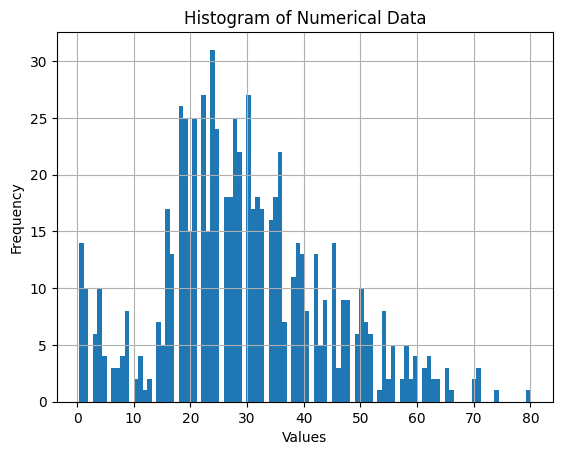

In [40]:
histogram = titanic_data['Age'].hist(bins=100)
plt.title('Histogram of Numerical Data')
plt.xlabel('Values')
plt.ylabel('Frequency')

## Pie Chart of Passanger Class

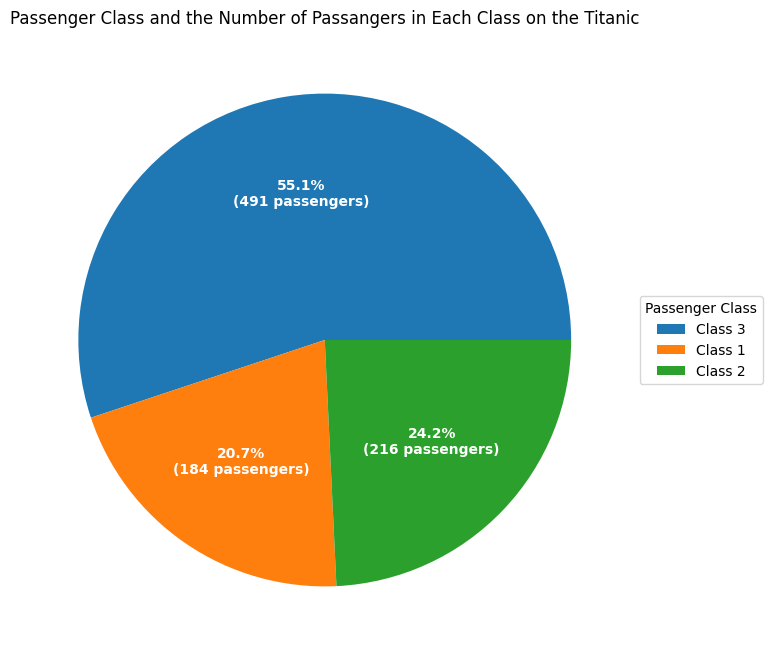

In [37]:
## Creating a figure in the subplot of the Pie chart
fig, ax = plt.subplots(figsize=(32, 8), subplot_kw=dict(aspect="equal"))

## Define the data for the pie chart
## The count of passengers in each class (Pclass)
pclass_counts = titanic_data['Pclass'].value_counts()

## Labels for the pie chart slices
labels = pclass_counts.index.astype(str) ## Converting th index into strings

## The recipe (proportions) for the pie chart

proportions = [pclass_counts[3],  ## Count of passengers in class 3
          pclass_counts[2],  ## Count of passengers in class 2
          pclass_counts[1]]  ## count of passangers in class 1

## Legend filler
Legend = [f'Class {cls}' for cls in labels]

## Function to format autopct labels
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d} passengers)".format(pct, absolute)

## Creating the pie chart
wedges, texts, autotexts = ax.pie(proportions, autopct=lambda pct: func(pct, proportions),\
                                  textprops=dict(color="w"), labels=labels)

## Add a legend
ax.legend(wedges, Legend,
          title="Passenger Class",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=10, weight="bold")
## Adding title
ax.set_title("Passenger Class and the Number of Passangers in Each Class on the Titanic")

plt.show()

In [129]:
# Create a contingency table comparing 'Sex' and 'Survived'
contingency_table = pd.crosstab(titanic_data["Sex"], titanic_data["Survived"])
print("Contingency Table:\n", contingency_table)

# chi-square test
chi2, p, _, _, = scipy.stats.chi2_contingency(contingency_table)

# Print the results
print("\nChi-square statistic:", chi2)
print("P-value:", p)

Contingency Table:
 Survived    0    1
Sex               
female     81  233
male      468  109

Chi-square statistic: 260.71702016732104
P-value: 1.1973570627755645e-58


## Chi Square Test

In [ ]:
## Chi Squared Test
titanic_df = pd.crosstab(titanic_data["Survived"], titanic_data["Pclass"])
print(titanic_df)

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119


In [ ]:
## Expected value is the expected vales of the data.
c, p, dof, expected = scipy.stats.chi2_contingency(titanic_df)
print("The P Value is:", p)

The P Value is: 4.549251711298793e-23


In [ ]:
## P value represents the significants of the data.
print("The Expected Values are:", expected)

The Expected Values are: [[133.09090909 113.37373737 302.53535354]
 [ 82.90909091  70.62626263 188.46464646]]


The class is not correlated to the class the passanger was located in because the values in the actual survied number of passangers for the classes being (136, 87, 119) and decieced being (80, 97, 372). With the expected survival for the classes being (82, 70, 188) and decieced being (133, 113, 302) with the differences between the two categories being (54, 17, 69) for the survived and for the decieced (53, 17, 70). Meaning that the two categories values are independant of one-another.

## Heatmap of the Correlation between the Categories

Text(0.5, 1.0, 'Correlation Matrix')

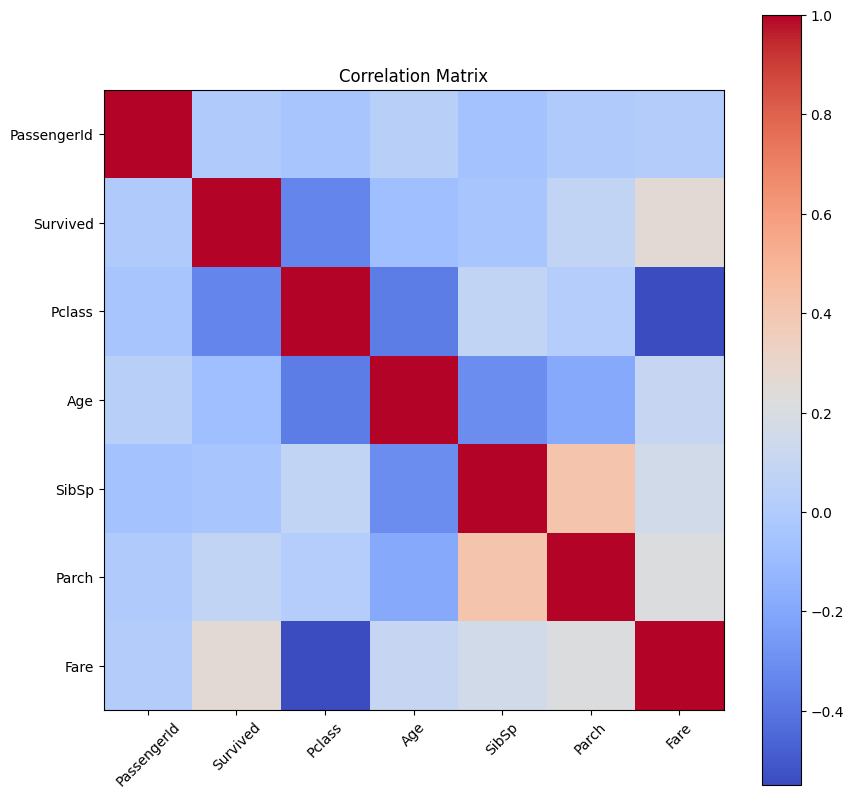

In [ ]:
## pulling out only numerical values to use
numerical_features = titanic_data.select_dtypes(include=[np.number])
## creating the correlation matrix
correlation_matrix = numerical_features.corr()
## creating the heatmap
plt.figure(figsize=(10,10))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
## X and Y labels
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.colorbar()
plt.title('Correlation Matrix')

The values Highlighted in red represent the most correlated for thoes categories, and the shades of blue represent the higher and lower corelation between the categories.

## Scatter Plot

In [44]:
print(titanic_data.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


R Value is: 0.0960666917690389


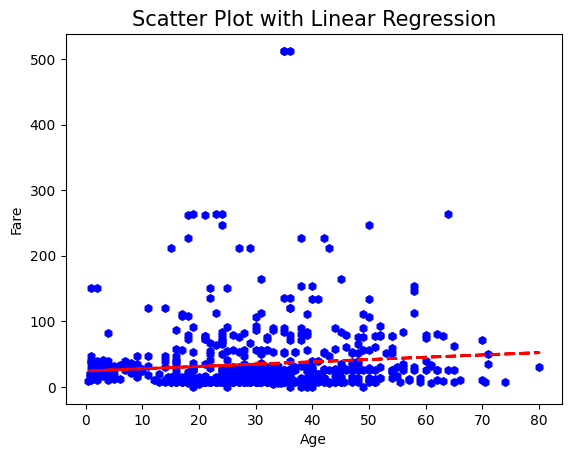

In [122]:
x = titanic_data['Age'].dropna()
# Use the index of x to select y values
y = titanic_data['Fare'][x.index].dropna()

plt.scatter(x, y, s=30, color="blue", marker="h")

linear_fit = np.polyfit(x, y, 1)
linear_model = np.poly1d(linear_fit)

r_value = np.corrcoef(x, y)[0, 1]
print("R Value is:", r_value)

plt.plot(x, linear_model(x), linewidth=2, color="red", linestyle="--")


# labels and titles
plt.xlabel('Age', fontsize=10)
plt.ylabel('Fare', fontsize=10)
plt.title('Scatter Plot with Linear Regression', fontsize=15)

plt.show()

#Box and Wisker

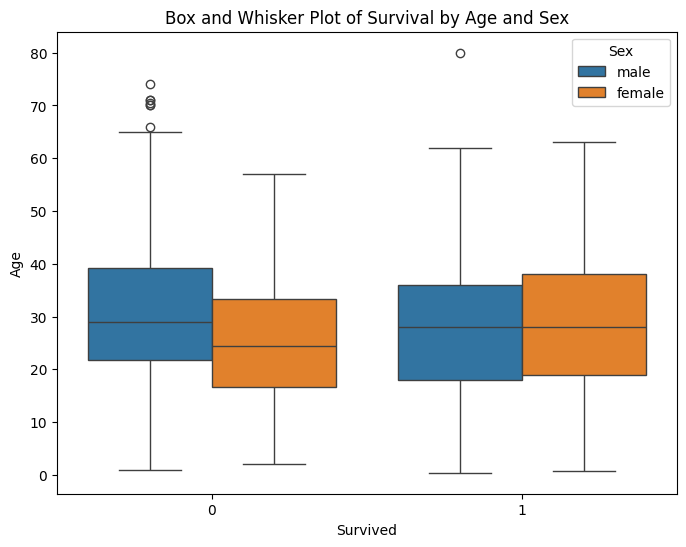

In [162]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Survived', y='Age', hue='Sex', data=titanic_data)
plt.title('Box and Whisker Plot of Survival by Age and Sex')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()

#IDK

In [140]:
fares_Q = titanic_data.query("Embarked=='Q'")['Fare']
fares_S = titanic_data.query("Embarked=='S'")['Fare']
fares_C = titanic_data.query("Embarked=='C'")['Fare']
print(fares_Q)
print(fares_S)
print(fares_C)


5       8.4583
16     29.1250
22      8.0292
28      7.8792
32      7.7500
        ...   
790     7.7500
825     6.9500
828     7.7500
885    29.1250
890     7.7500
Name: Fare, Length: 77, dtype: float64
0       7.2500
2       7.9250
3      53.1000
4       8.0500
6      51.8625
        ...   
883    10.5000
884     7.0500
886    13.0000
887    30.0000
888    23.4500
Name: Fare, Length: 644, dtype: float64
1      71.2833
9      30.0708
19      7.2250
26      7.2250
30     27.7208
        ...   
866    13.8583
874    24.0000
875     7.2250
879    83.1583
889    30.0000
Name: Fare, Length: 168, dtype: float64


In [141]:
plt.savefig("figure.png")

<Figure size 640x480 with 0 Axes>